In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import scipy.optimize as optimize
%config InlineBackend.figure_format = "retina"

In [2]:
# Define the boltzman constant

from pint import UnitRegistry
ureg = UnitRegistry()
Kb = ureg.boltzmann_constant
Kb = (1 * Kb).to('eV/kelvin').magnitude

In [3]:
def get_concentration(Formation_energy, T):
    
    return np.exp(-Formation_energy / (Kb*T))

In [4]:
# Some energy values obtained from DFT calculations:

# Binary system

E_formB2 = -0.6623950965434235 # Formation energy per atom of B2 NiAl
EnergyB2 = -10.538507650072436 # Supercell energy of B2 NiAl with one Ni and Al atoms
Energy_tot_Nivac = -667.92703466 # Supercell energy of B2 NiAl with one Ni vacancy
Energy_tot_Alvac = -668.29706527 # Supercell energy of B2 NiAl with one Al vacancy
Energy_tot_Nianti = -675.16111505 # Supercell energy of B2 NiAl with one Ni antisite
Energy_tot_Alanti = -671.1130517 # Supercell energy of B2 NiAl with one Al antisite
Energy_tot_PtonNi = -675.60409945 # Supercell energy of B2 NiAl with one Pt on Ni
Energy_tot_PtonAl = -676.26162198 # Supercell energy of B2 NiAl with one Pt on Al
Ni_bulk = -5.468482140262621 # Ni ferromagnetic bulk energy
Al_bulk = -3.745235316722968 # Al bulk energy
Pt_bulk = -6.096600128752684 # Pt bulk energy
Pd_bulk = -5.2161320522301935 # Pd bulk energy
n_repeat = 4 # 4x4x4 supercell

# Ternary system 10%Pt

total_E10PtB2NiAl = -689.4408127619649 # total energy of B2NiAl+10%Pt i.e 128 atoms
EfPtB2NiAl = -0.7156043880040347 # Formation energy of B2NiAl+10%Pt per atom

# Calculated defect formation energies

calc_E_Nivac = 0.26648108458032055
calc_E_Alvac = 1.461295550656755
calc_E_Ptvac = 0.7063524699675993
calc_E_Nianti = 0.9437994466730769
calc_E_Alanti = 1.4861039994896377
calc_E_PtonNi = 0
calc_E_PtonAl = 0.9536542820448224

# Ternary system 10%Pd


In [5]:
def get_formation_vacancy(Energy_tot, element, n_repeat=n_repeat):
    # Total formation Enthalpy of Ni and Al vacancy.
    if element=='Ni':
        tot_enthalpy = Energy_tot - (n_repeat**3)*Al_bulk - (n_repeat**3 - 1)*Ni_bulk
    if element=='Al':
        tot_enthalpy = Energy_tot - (n_repeat**3 - 1)*Al_bulk - (n_repeat**3)*Ni_bulk
        
    # vacancy enthalpy of Ni = total formation enthalpy with Ni vacancy - 127*formation enthalpy of B2NiAl per atom

    return tot_enthalpy - (2*(n_repeat**3) - 1)*(E_formB2)

In [6]:
def get_formation_antisites(Energy_tot, element, n_repeat=n_repeat):
    # Ni antisite energy formation = total energy of antisite - total energy of B2 NiAl - (energy of Ni - energy of Al)
    if element=='Ni':
        return Energy_tot - n_repeat**3 * EnergyB2 - (Ni_bulk - Al_bulk)
    # Al antisite energy formation = total energy of antisite - total energy of B2 NiAl - (energy of Al - energy of Ni)
    if element=='Al':
        return Energy_tot - n_repeat**3 * EnergyB2 - (Al_bulk - Ni_bulk)

In [7]:
def get_box_energy(tot, i, Ni_bulk = Ni_bulk, Al_bulk = Al_bulk, Pt_bulk=Pt_bulk):
    """
    Returns: supercell energy - n_Ni * Ni_Bulk - n_Al * Al_bulk - n_Pt * Pt_bulk
    
    """
    if i == 'Nivac':
        n_Ni = 63
        n_Al = 64
        n_Pt = 0
    if i == 'Alvac':
        n_Ni = 64
        n_Al = 63
        n_Pt = 0
    if i == 'Nianti':
        n_Ni = 65
        n_Al = 63
        n_Pt = 0
    if i == 'Alanti':
        n_Ni = 63
        n_Al = 65
        n_Pt = 0
    if i == 'PtonNi':
        n_Ni = 63
        n_Al = 64
        n_Pt = 1
    if i == 'PtonAl':
        n_Ni = 64
        n_Al = 63
        n_Pt = 1    
    if i == 'Bulk':
        n_Ni = 64
        n_Al = 64
        n_Pt = 0
        
    return tot - n_Ni * Ni_bulk - n_Al * Al_bulk - n_Pt * Pt_bulk

In [8]:
mu_Al = np.linspace(2*E_formB2 , 0, 1000)
mu_Ni = 2*E_formB2 - mu_Al

In [9]:
# Ni vacancy with respect to chemical potential: Supercell energy - defect free energy + mu_Ni

Ef_Nivac = get_box_energy(Energy_tot_Nivac, i='Nivac') - get_box_energy(64*EnergyB2, i='Bulk') + mu_Ni 

In [10]:
# Al vacancy with respect to chemical potential: Supercell energy - defect free energy + mu_Al

Ef_Alvac = get_box_energy(Energy_tot_Alvac, i='Alvac') - get_box_energy(64*EnergyB2, i='Bulk') + mu_Al 

In [11]:
# Ni antisite with respect to chemical potential: Supercell energy - defect free energy - mu_Ni + mu_Al

Ef_Nianti = get_box_energy(Energy_tot_Nianti, i='Nianti') - get_box_energy(64*EnergyB2, i='Bulk') - mu_Ni + mu_Al 

In [12]:
# Al antisite with respect to chemical potential: Supercell energy - defect free energy - mu_Al + mu_Ni

Ef_Alanti = get_box_energy(Energy_tot_Alanti, i='Alanti') - get_box_energy(64*EnergyB2, i='Bulk') + mu_Ni - mu_Al 

# Defect energies of B2 NiAl

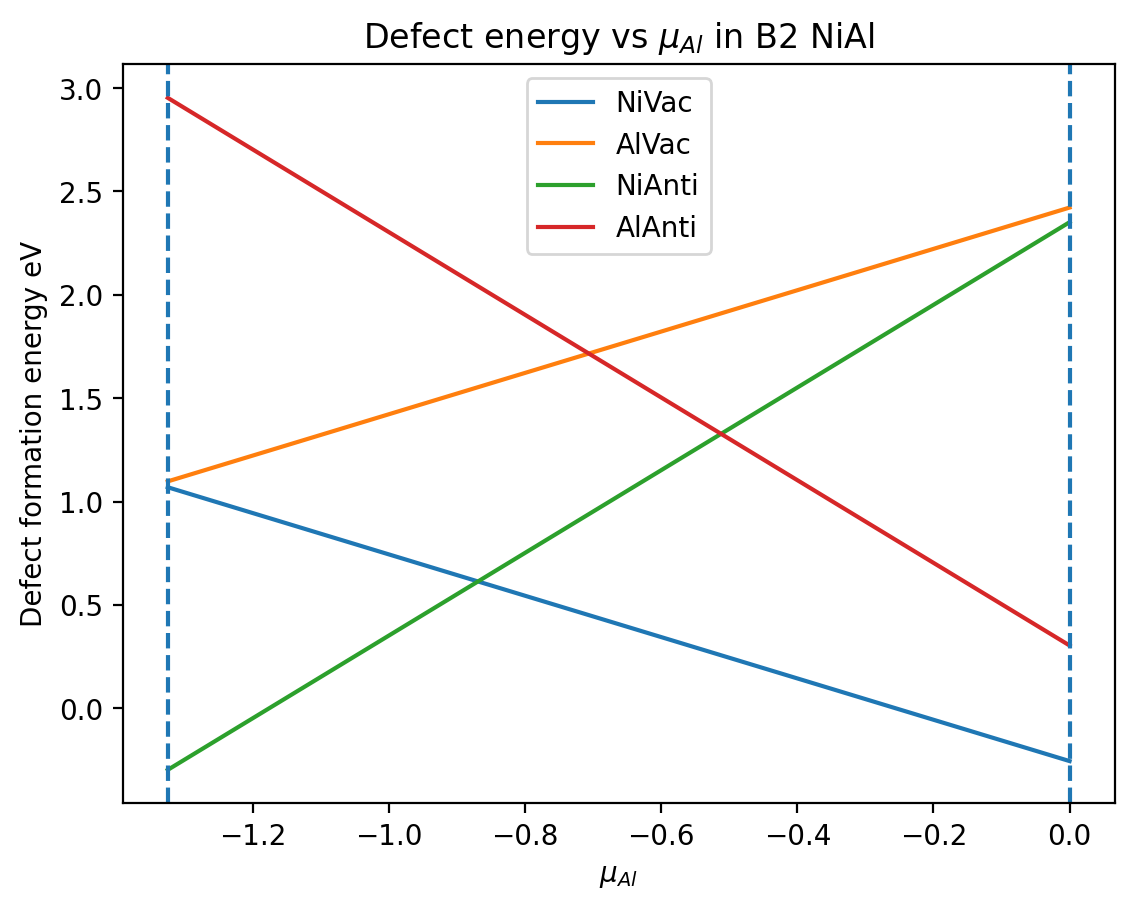

In [13]:
plt.plot(mu_Al, Ef_Nivac, label='NiVac')
plt.plot(mu_Al, Ef_Alvac, label='AlVac')
plt.plot(mu_Al, Ef_Nianti, label='NiAnti')
plt.plot(mu_Al, Ef_Alanti, label='AlAnti')
plt.axvline(0, linestyle='--')
plt.axvline(2*E_formB2, linestyle='--')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl');

# Defect concentration of B2 NiAl

In [14]:
T = 1300

\begin{equation}
    S = k_B (1 + C_{Va_{Ni}} + C_{Va_{Al}}) ln(\frac{1 + C_{Va_{Ni}} + C_{Va_{Al}}}{2}) - k_B \sum_i C_i ln (C_i )
\end{equation}    

Equations from the paper : https://www.sciencedirect.com/science/article/pii/S1359645405000406?ref=cra_js_challenge&fr=RR-1

# Chemical potential approach (i.e Defect energy is a function of chemical potential)

In [15]:
NiAl_exp1 = np.exp(-(Ef_Alanti - Ef_Nivac + Ef_Alvac) / (Kb*T))
NiAl_exp2 = np.exp(-(Ef_Nianti + Ef_Nivac - Ef_Alvac) / (Kb*T))
# NiAl_exp3 = np.exp(-(Ef_PtonAl - Ef_PtonNi - Ef_Alvac + Ef_Nivac) / (Kb*T))
NiAl_exp4 = np.exp(-(Ef_Nivac + Ef_Alvac) / (Kb*T))

In [16]:
def defect_concentration_B2NiAl_function(vars, yNi):
    """
    C_vacAl = a
    C_vacNi = b
    C_AlNi = c
    C_NiAl = d
    C_PtAl = e
    C_PtNi = f
    """

    a, b, c, d = vars
    e, f = 0.0, 0.0
    return [2*a*c - (b*(1 - 2*d - 2*e - a + b)) * np.mean(NiAl_exp1), 2*b*d - (a*(1 - 2*c - 2*f + a + b)) * np.mean(NiAl_exp2),
            4*a*b - (1 + a + b)**2 * np.mean(NiAl_exp4), (1 - 2*c + 2*d - 2*f + a - b) - 2*yNi ] 

In [17]:
def solver_B2NiAl(yNi, values):
    
    return fsolve(defect_concentration_B2NiAl_function, values, args=yNi, xtol = 1e-11, maxfev=10000)

In [18]:
def defect_concentration_B2NiAl_old_function(vars, yNi):
    """
    C_vacAl = a
    C_vacNi = b
    C_AlNi = c
    C_NiAl = d
    C_PtAl = e
    C_PtNi = f
    """

    a, b, c, d = vars
    e, f = 0.0, 0.0
    return [2*a*c - (b*(1 - 2*d - 2*e - a + b)) * old_NiAl_exp1, 2*b*d - (a*(1 - 2*c - 2*f + a + b)) * old_NiAl_exp2,
            4*a*b - (1 + a + b)**2 * old_NiAl_exp4, (1 - 2*c + 2*d - 2*f + a - b) - 2*yNi ] 

In [19]:
def solver_old_B2NiAl(yNi, values):
    
    return fsolve(defect_concentration_B2NiAl_old_function, values, args=yNi, xtol = 1e-11, maxfev=10000)

In [20]:
y_B2Ni_linspace = np.linspace(.6, .45, len(mu_Al))
xx = 1 - y_B2Ni_linspace # Al mole fraction for B2 NiAl

In [21]:
# Solving the system of non-linear equation 
#         a     b      c     d    
prev0 = [2e-6, 3e-4, 1e-10, 0.1] # First estimate where F(x) = 0 
ans0 = []

for i in range(len(y_B2Ni_linspace)):
    prev0 = solver_B2NiAl(y_B2Ni_linspace[i], prev0)
    ans0.append(prev0)
ans0 = np.array(ans0)

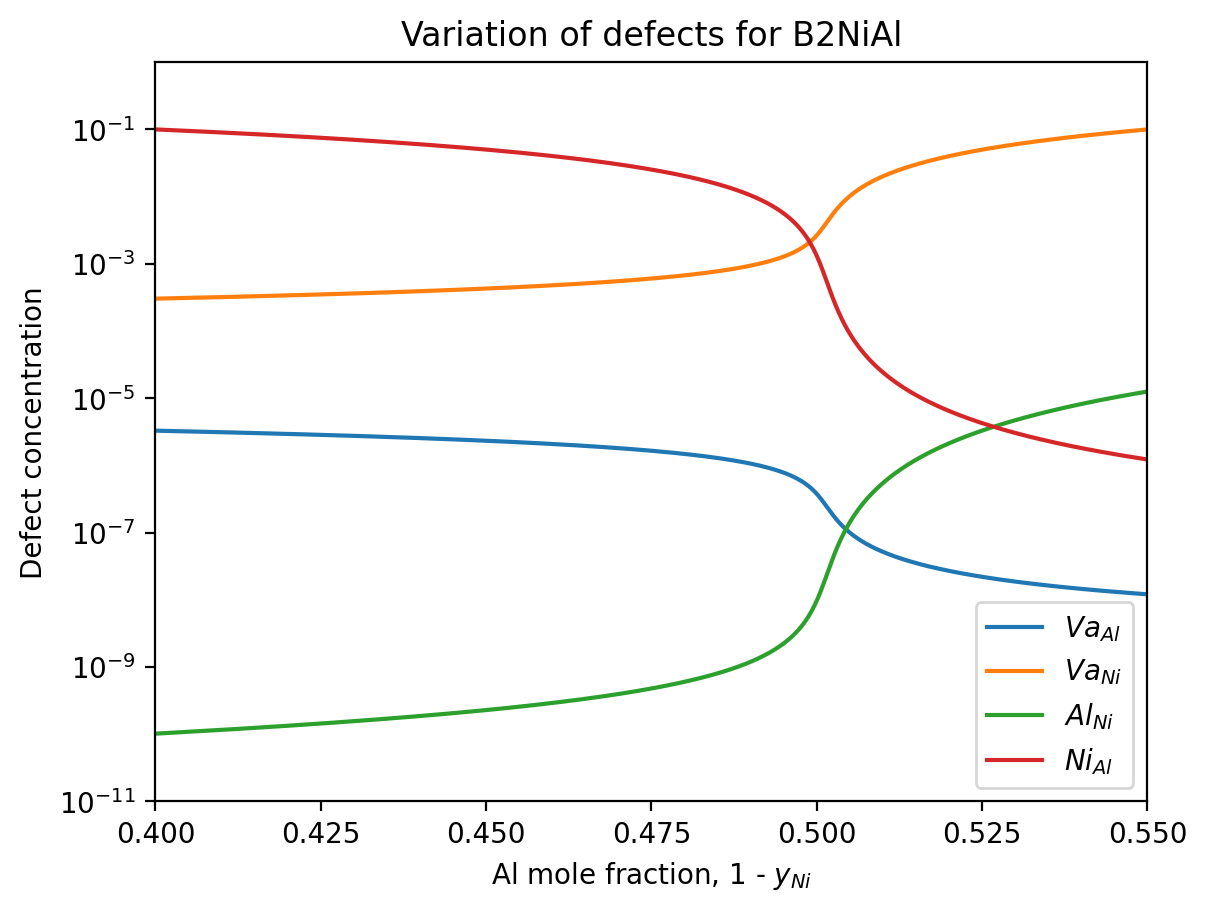

In [22]:
# Variation of defects at 1300K for B2NiAl.
plt.plot(xx, ans0)
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$"], loc="lower right")
plt.title("Variation of defects for B2NiAl");

### Plotting the values of my calculated B2NiAl used in my project-work

In [23]:
old_Ef_Nivac = get_formation_vacancy(Energy_tot_Nivac,'Ni')
old_Ef_Alvac = get_formation_vacancy(Energy_tot_Alvac,'Al')
old_Ef_Nianti = get_formation_antisites(Energy_tot_Nianti,'Ni')
old_Ef_Alanti = get_formation_antisites(Energy_tot_Alanti,'Al')

In [24]:
old_NiAl_exp1 = np.exp(-(old_Ef_Alanti - old_Ef_Nivac + old_Ef_Alvac) / (Kb*T))
old_NiAl_exp2 = np.exp(-(old_Ef_Nianti + old_Ef_Nivac - old_Ef_Alvac) / (Kb*T))
# NiAl_exp3 = np.exp(-(Ef_PtonAl - Ef_PtonNi - Ef_Alvac + Ef_Nivac) / (Kb*T))
old_NiAl_exp4 = np.exp(-(old_Ef_Nivac + old_Ef_Alvac) / (Kb*T))

In [25]:
# Solving the system of non-linear equation 
#         a     b      c     d    
old_prev0 = [2e-6, 3e-4, 1e-10, 0.1] # First estimate where F(x) = 0 
old_ans0 = []

for i in range(len(y_B2Ni_linspace)):
    old_prev0 = solver_old_B2NiAl(y_B2Ni_linspace[i], old_prev0)
    old_ans0.append(old_prev0)
old_ans0 = np.array(old_ans0)

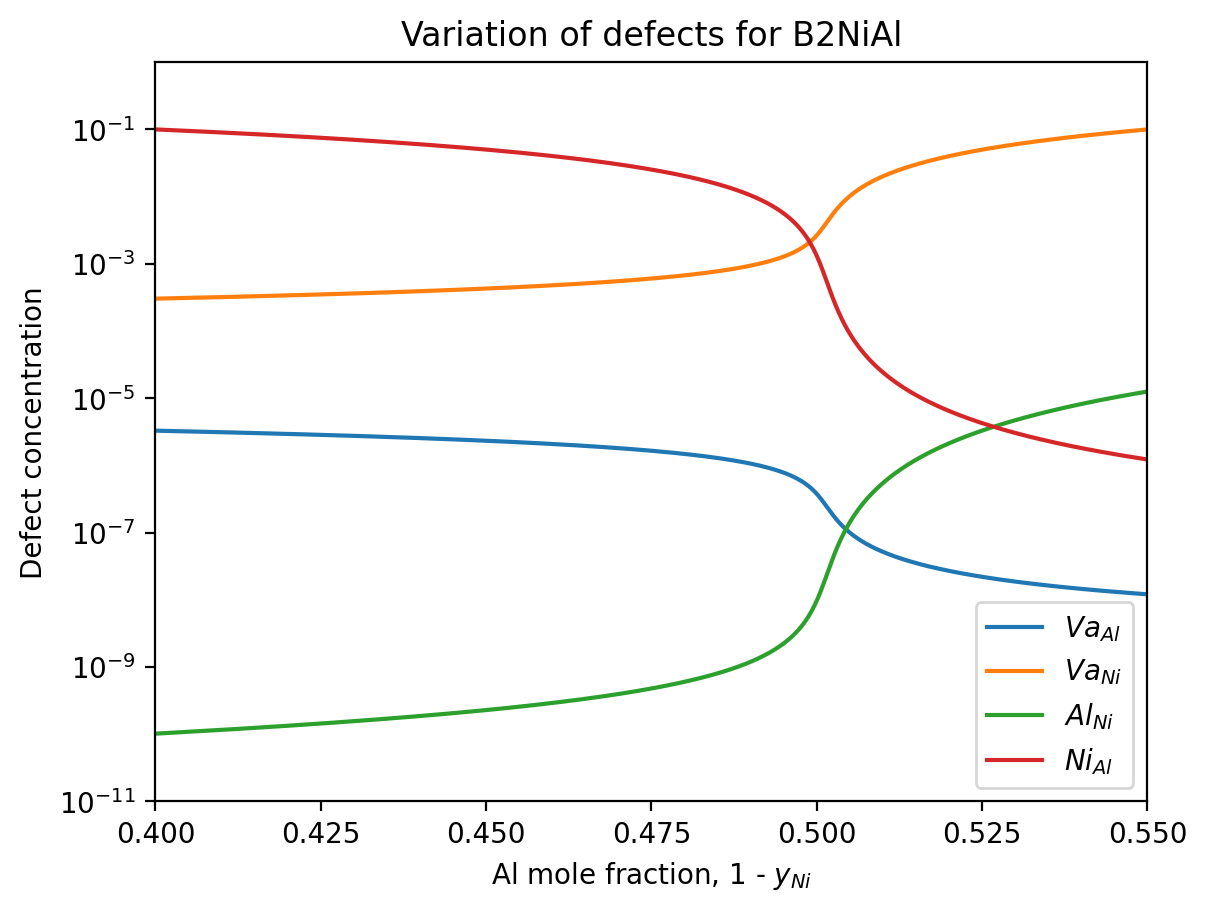

In [26]:
# Variation of defects at 1300K for B2NiAl.
plt.plot(xx, old_ans0)
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$"], loc="lower right")
plt.title("Variation of defects for B2NiAl");

## Comparison

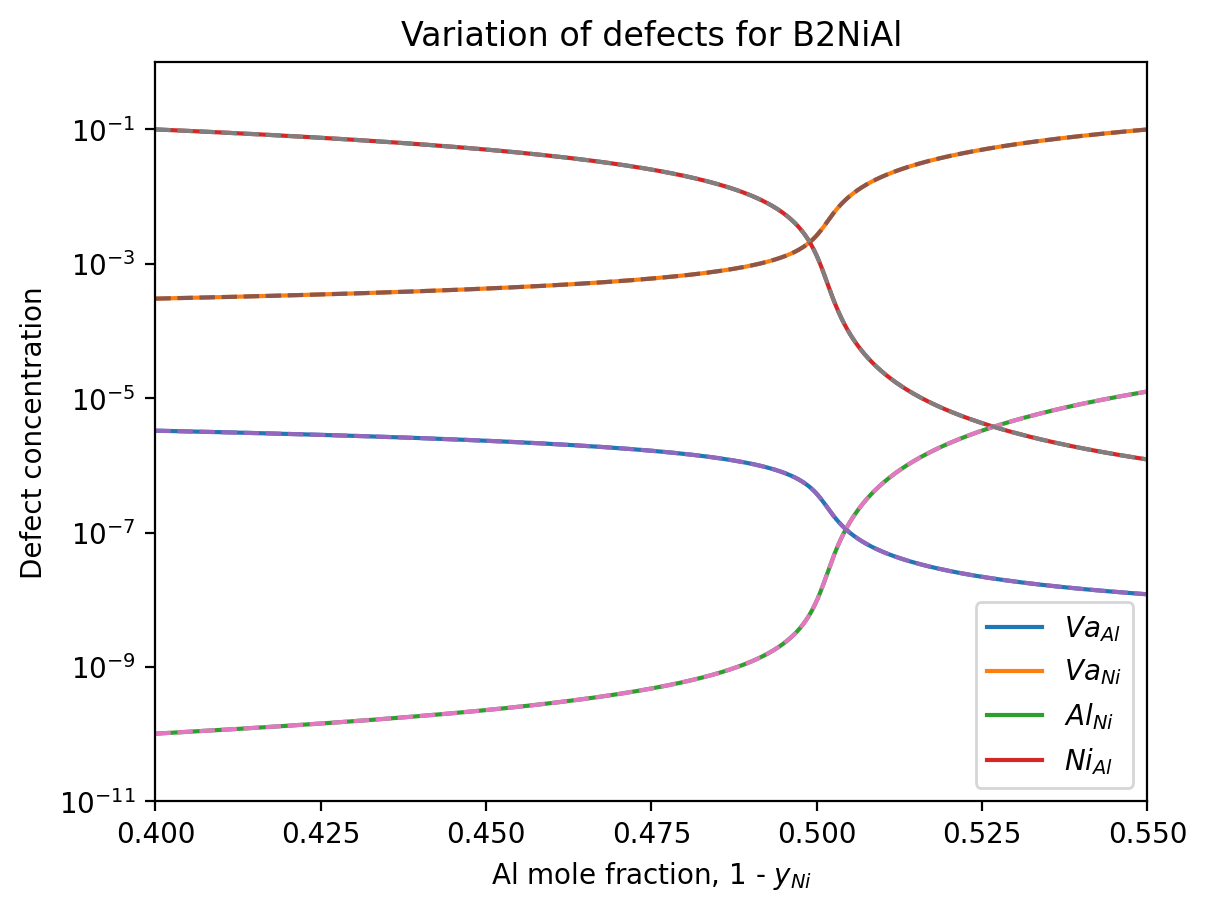

In [27]:
plt.plot(xx, old_ans0) # old method used in project work
plt.plot(xx, ans0, linestyle='--') # chemical potential approach
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$"], loc="lower right")
plt.title("Variation of defects for B2NiAl");

# Defect energetics of B2 NiAl + 10%Pt

In [28]:
def get_10Ptbox_energy(tot, i, Ni_bulk = Ni_bulk, Al_bulk = Al_bulk, Pt_bulk = Pt_bulk):
    """
    Returns supercell energy - n_Ni * Ni_Bulk - n_Al * Al_bulk -n_Pt * Pt_bulk
    
    """
    if i == 'Nivac':
        n_Ni = 50
        n_Al = 64
        n_Pt = 13
    if i == 'Alvac':
        n_Ni = 51
        n_Al = 63
        n_Pt = 13
    if i == 'Ptvac':
        n_Ni = 51
        n_Al = 64
        n_Pt = 12
    if i == 'Nianti':
        n_Ni = 52
        n_Al = 63
        n_Pt = 13
    if i == 'Alanti':
        n_Ni = 50
        n_Al = 65
        n_Pt = 13
    if i == 'PtonNi':
        n_Ni = 50
        n_Al = 64
        n_Pt = 14
    if i == 'PtonAl':
        n_Ni = 51
        n_Al = 63
        n_Pt = 14
    if i == 'Bulk':
        n_Ni = 51
        n_Al = 64
        n_Pt = 13
    return tot - n_Ni * Ni_bulk - n_Al * Al_bulk - n_Pt * Pt_bulk

<!-- $$y_{Pt_{Ni}} + y_{Pt_{Al}} = y_{Pt} $$
$$ y_{Pt} = 0.1$$
$$e^-\frac{E^f_{Pt_{Ni}}}{k_B T} + e^-\frac{E^f_{Pt_{Al}}}{k_B T} = 0.1$$

$$\frac{E^f_{Pt_{Ni}}}{k_B T} + \frac{E^f_{Pt_{Al}}}{k_B T} = -ln(0.1)$$
$$E^f_{Pt_{Ni}} + E^f_{Pt_{Al}} = -k_B T ln(0.1)$$
$$E^f_{Pt_{Ni}} = <E^{box}_{Pt_{Ni}}> - [E^{box}_{B2NiAl10Pt}] + \mu_{Ni} - \mu_{Pt} $$
$$E^f_{Pt_{Al}} = <E^{box}_{Pt_{Al}}> - [E^{box}_{B2NiAl10Pt}] + \mu_{Al} - \mu_{Pt} $$

$$<E^{box}_{Pt_{Ni}}> + <E^{box}_{Pt_{Al}}> - 2[E^{box}_{B2NiAl10Pt}] - 2\mu_{Pt} + E^f_{B2NiAl} = -k_B T ln(0.1) $$

$$\mu_{Pt} = \frac{1}{2} [<E^{box}_{Pt_{Ni}}> + <E^{box}_{Pt_{Al}}> - 2[E^{box}_{B2NiAl10Pt}] + k_B T ln(0.1) + E^f_{B2NiAl}] $$ -->

In [29]:
def get_indexMap(my_list):
    """
    Gives the values in the list and their corresponding indexes.
    
    """
    indexMap = dict()
    for index, val in enumerate(my_list):
        if val in indexMap:
            indexMap[val].append(index)
        else:
            indexMap[val] = [index]
            
    return indexMap    

In [30]:
def get_prefactor(n, p, r):
    
    return comb(n, r) * p ** r * (1 - p) ** (n - r)

In [31]:
def get_weighted_concentration(concentrations, list_nn, indices_to_eval, Pt_cont, num_nearest_neighbour):
    """
    Gives the binomial weighted average according to the nearest neighbor.
    
    Keyword arguments:
    concentrations (list): List of concentrations which are to be average.
    list_nn (list): List of nearest neighbors.
    indices_to_eval (list): List of indices to evaluate of list_nn.
    Pt_cont (float): Concentration of Pt.
    num_nearest_neighbour (int): Number of nearest neighbors. Ex: 8 for first nearest neighbor, 6 for second nearest neighbour.
    
    """
    
    
    weighted_sum = 0
    total_weight = 0
    
    for index in indices_to_eval:
        prefactor = get_prefactor(num_nearest_neighbour, Pt_cont, list_nn[index])
        weighted_sum += prefactor * concentrations[index]
        total_weight += prefactor
    
    return weighted_sum / total_weight

In [32]:
def comb(n, k):
    
    return np.math.factorial(n) / (np.math.factorial(k)*np.math.factorial(n-k))

In [33]:
list_fnn = [2, 0, 4, 0, 2, 0, 0, 0]
list_snn = [2, 0, 0, 1, 1, 3, 2, 2]

concentration_Pt = 0.1

In [34]:
Energies_Ni_vac = np.array([-682.97977858, -682.91755055, -682.74380818, -682.85062155, -683.00325599, -683.15672008, -683.07610917, -683.07988437])
Energies_Al_vac = np.array([-683.66462163,-683.25357966,-684.00813511,-683.43114508,-683.68748951,-683.23396061,-683.25875505, -683.2409652])
Energies_Ni_anti = np.array([-690.22282818, -690.19422028, -690.24191719, -690.23455013, -690.21813293, -690.20772702, -690.21116909, -690.25453341])
Energies_Al_anti = np.array([-686.34753595, -686.02603695, -686.04955644, -686.09514889, -686.43233931, -686.24264709, -685.99961279, -686.07497013])
Energies_PtonAl = np.array([-691.27445271, -691.41632525, -691.13494476, -691.35168918, -691.20464414, -691.53831291, -691.55195659, -691.65346678])
Energies_PtonNi = np.array([-690.65043562, -690.639174, -690.71500831, -690.69571903, -690.61046354, -690.60873226, -690.60083226, -690.58671423])

In [35]:
Mu_Al = np.linspace(2*EfPtB2NiAl, 0, 1000)
Mu_Ni = 2*EfPtB2NiAl - Mu_Al

In [36]:
def get_binomial_weighted_formation_energies(Energies, defect_name):
    if defect_name == 'Nivac':
        c_defect=[]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + Mu_Ni) / (Kb*T)))
    if defect_name == 'Alvac':
        c_defect=[]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') + Mu_Al) / (Kb*T)))
    if defect_name == 'Nianti':
        c_defect=[]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - Mu_Ni + Mu_Al) / (Kb*T)))
    if defect_name == 'Alanti':
        c_defect=[]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - Mu_Al + Mu_Ni) / (Kb*T)))
    if defect_name == 'PtonAl':
        c_defect=[]
        for i in range(8):c_defect.append(np.exp(-(get_10Ptbox_energy(Energies[i], i=defect_name) - get_10Ptbox_energy(total_E10PtB2NiAl, i='Bulk') - Mu_Pt + Mu_Al) / (Kb*T)))
    
    indexMap = get_indexMap(list_fnn)
    second_nn_weighted_concentration = [get_weighted_concentration(c_defect, list_snn, indexMap[i], 
                                                               concentration_Pt, 8) for i in sorted(indexMap)]

    final_wc = get_weighted_concentration(second_nn_weighted_concentration, sorted(indexMap), 
                                      np.arange(len(indexMap)), concentration_Pt, 6)

    return -np.log(final_wc) * Kb * T

In [37]:
def get_binomial_weighted_Pt_on_Ni_Al_energy(Energies):
    
    indexMap = get_indexMap(list_fnn)

    second_nn_weighted_energies = [get_weighted_concentration(Energies, list_snn, indexMap[i], 
                                                               concentration_Pt, 8) for i in sorted(indexMap)]

    final_weighted_energy = get_weighted_concentration(second_nn_weighted_energies, sorted(indexMap), 
                                      np.arange(len(indexMap)), concentration_Pt, 6)

    return final_weighted_energy

## Taking Energy of Pt on Ni sub-lattice = 0

$$ \mu_{Ni} + \mu_{Al} =  2 E^f_{B2NiAl10Pt}$$
$$E^f_{B2NiAl10Pt} \text{is formation energy of B2NiAl+10% Pt per atom}$$
$$E^f_{Pt_{Ni}} = <E^{box}_{Pt_{Ni}}> - [E^{box}_{B2NiAl10Pt}] + \mu_{Ni} - \mu_{Pt} = 0$$

$$E^f_{Pt_{Al}} = <E^{box}_{Pt_{Al}}> - [E^{box}_{B2NiAl10Pt}] + \mu_{Al} - \mu_{Pt} $$

$$ \text{Subtracting the above two equations, i.e } E^f_{Pt_{Al}} - E^f_{Pt_{Ni}} $$

$$E^f_{Pt_{Al}} =<E^{box}_{Pt_{Al}}> -  <E^{box}_{Pt_{Ni}}> + \mu_{Al} - \mu_{Ni}$$

In [38]:
# Ni vacancy with respect to chemical potential

EfMuPt_Nivac = get_binomial_weighted_formation_energies(Energies_Ni_vac,'Nivac')

In [39]:
# Al vacancy with respect to chemical potential

EfMuPt_Alvac = get_binomial_weighted_formation_energies(Energies_Al_vac,'Alvac')

In [40]:
# Ni antisite with respect to chemical potential

EfMuPt_Nianti = get_binomial_weighted_formation_energies(Energies_Ni_anti,'Nianti')

In [41]:
# Al antisite with respect to chemical potential

EfMuPt_Alanti = get_binomial_weighted_formation_energies(Energies_Al_anti,'Alanti')

In [42]:
# Pt on Al sub-lattice with respect to chemical potential
# Ef = <E_Pt on Al> - <E_Pt on Ni> + mu_Al - mu_Ni

EfMuPt_PtonAl = get_10Ptbox_energy(get_binomial_weighted_Pt_on_Ni_Al_energy(Energies_PtonAl), i = 'PtonAl') - get_10Ptbox_energy(get_binomial_weighted_Pt_on_Ni_Al_energy(Energies_PtonNi), i = 'PtonNi')  + Mu_Al - Mu_Ni

In [43]:
EfMuPt_PtonNi = np.zeros((1000))

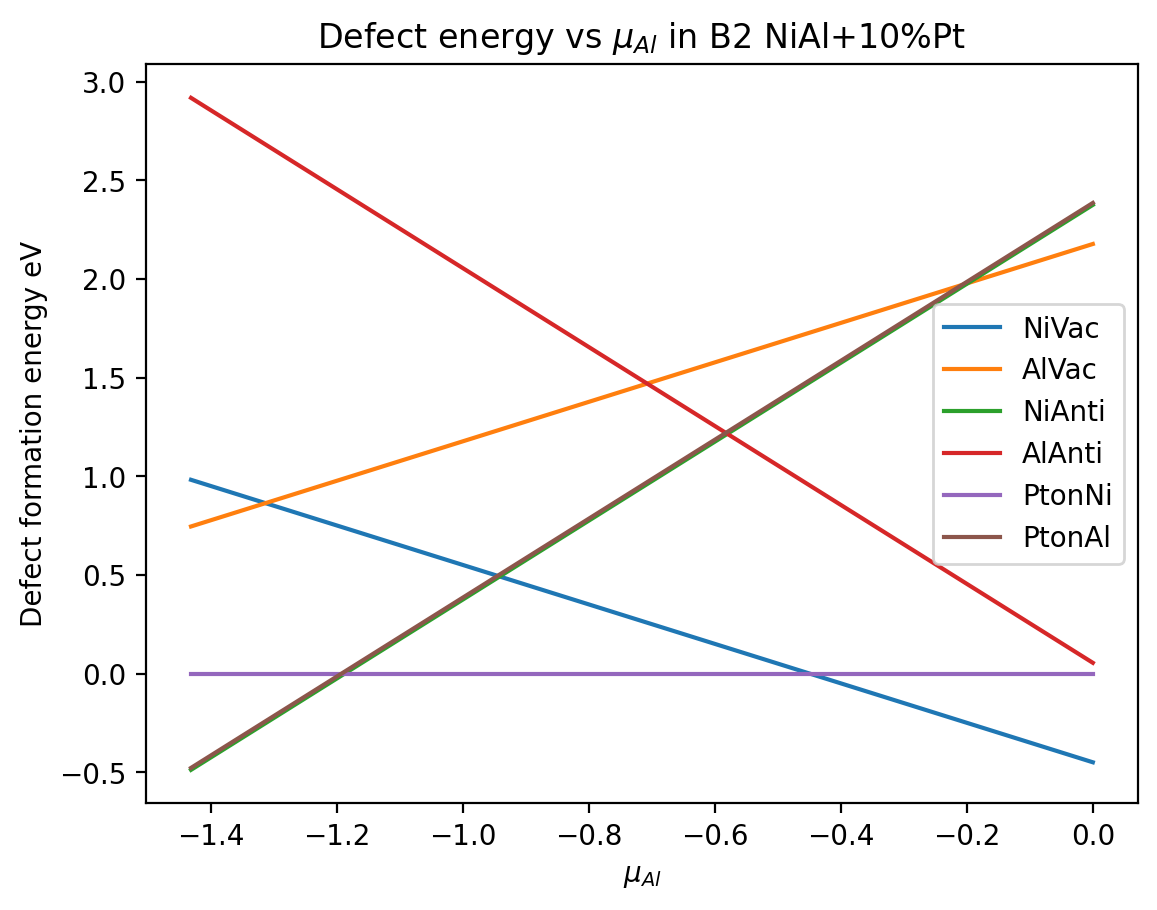

In [44]:
plt.plot(Mu_Al, EfMuPt_Nivac, label='NiVac')
plt.plot(Mu_Al, EfMuPt_Alvac, label='AlVac')
plt.plot(Mu_Al, EfMuPt_Nianti, label='NiAnti')
plt.plot(Mu_Al, EfMuPt_Alanti, label='AlAnti')
plt.plot(Mu_Al, EfMuPt_PtonNi, label='PtonNi')
plt.plot(Mu_Al, EfMuPt_PtonAl, label='PtonAl')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl+10%Pt');

# Defect concentration of B2 NiAl + 10%Pt

In [45]:
y_Ni_linspace = np.linspace(.5, .35, 900)
y_Pt = 0.1

def defect_concentration_Pt_function(vars, yNi):
    """
    y_vacAl = a
    y_vacNi = b
    y_AlNi = c
    y_NiAl = d
    y_PtAl = e
    y_PtNi = f
    """
    a, b, c, d, e, f = vars

    return [2*a*c - (b*(1 - 2*d - 2*e - a + b)) * Pt_exp1, 2*b*d - (a*(1 - 2*c - 2*f + a + b)) * Pt_exp2, 
            e*b - (f*a) * Pt_exp3, 4*a*b - (1 + a + b)**2 * Pt_exp4, 
            (1 - 2*c + 2*d - 2*f + a - b)/2 - yNi, e + f - y_Pt] 

def solver_Pt_calc(yNi, values):
    return fsolve(defect_concentration_Pt_function, values, args=yNi, xtol = 1e-11, maxfev=10000)

x = 1 - y_Pt - y_Ni_linspace

In [46]:
Pt_exp1 = np.mean(np.exp(-(EfMuPt_Alanti - EfMuPt_Nivac + EfMuPt_Alvac) / (Kb*T)))
Pt_exp2 = np.mean(np.exp(-(EfMuPt_Nianti + EfMuPt_Nivac - EfMuPt_Alvac) / (Kb*T)))
Pt_exp3 = np.mean(np.exp(-(EfMuPt_PtonAl - EfMuPt_PtonNi - EfMuPt_Alvac + EfMuPt_Nivac) / (Kb*T)))
Pt_exp4 = np.mean(np.exp(-(EfMuPt_Nivac + EfMuPt_Alvac) / (Kb*T)))

In [47]:
#               a              b               c                d             e                f
prev1 = [1.81893032e-05, 2.76936060e-03, 2.89898579e-09, 2.51120445e-02, 5.35141945e-03, 9.46485805e-02]
ans1 = []

for i in range(len(y_Ni_linspace)):
    prev1 = solver_Pt_calc(y_Ni_linspace[i], prev1)
    ans1.append(prev1)
ans1 = np.array(ans1)

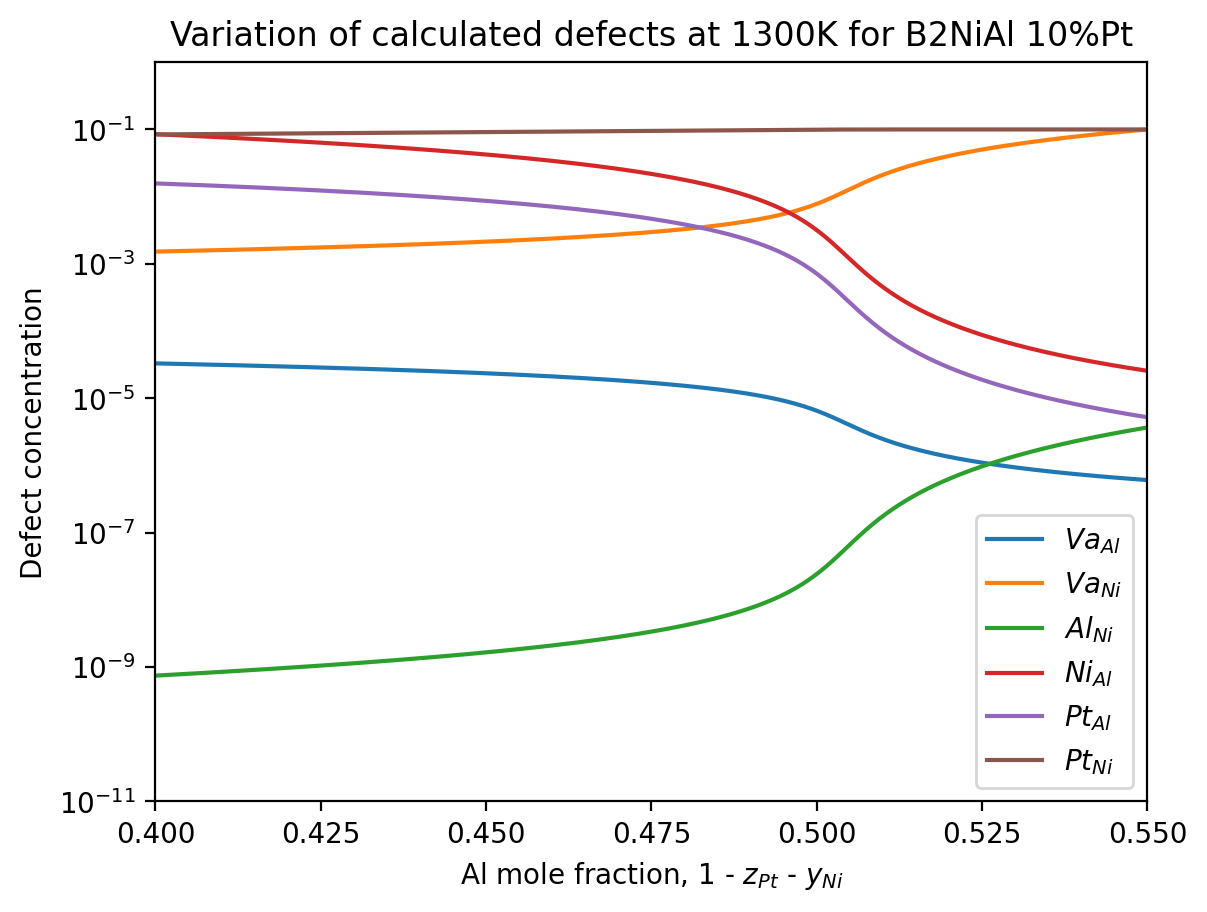

In [48]:
# Variation of calculated defects at 1300K for B2NiAl 10%Pt
plt.plot(x, ans1) # calculated defects
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
# plt.yticks(lst)
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $z_{Pt}$ - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$", "$Pt_{Al}$", "$Pt_{Ni}$"], loc="lower right")
plt.title("Variation of calculated defects at 1300K for B2NiAl 10%Pt");

In [49]:
exp1 = np.exp(-(calc_E_Alanti - calc_E_Nivac + calc_E_Alvac) / (Kb*T))
exp2 = np.exp(-(calc_E_Nianti + calc_E_Nivac - calc_E_Alvac) / (Kb*T))
exp3 = np.exp(-(calc_E_PtonAl - calc_E_PtonNi - calc_E_Alvac + calc_E_Nivac) / (Kb*T))
exp4 = np.exp(-(calc_E_Nivac + calc_E_Alvac) / (Kb*T))

In [50]:
def defect_concentration_function(vars, yNi):
    """
    y_vacAl = a
    y_vacNi = b
    y_AlNi = c
    y_NiAl = d
    y_PtAl = e
    y_PtNi = f
    """
    a, b, c, d, e, f = vars

    return [2*a*c - (b*(1 - 2*d - 2*e - a + b)) * exp1, 2*b*d - (a*(1 - 2*c - 2*f + a + b)) * exp2, 
            e*b - (f*a) * exp3, 4*a*b - (1 + a + b)**2 * exp4, 
            (1 - 2*c + 2*d - 2*f + a - b)/2 - yNi, e + f - y_Pt] 

def solver_calc(yNi, values):
    return fsolve(defect_concentration_function, values, args=yNi, xtol = 1e-11, maxfev=10000)

In [51]:
#               a              b               c                d             e                f
prev1 = [1.81893032e-05, 2.76936060e-03, 2.89898579e-09, 2.51120445e-02, 5.35141945e-03, 9.46485805e-02]
old_ans1 = []

for i in range(len(y_Ni_linspace)):
    prev1 = solver_calc(y_Ni_linspace[i], prev1)
    old_ans1.append(prev1)
old_ans1 = np.array(old_ans1)

/u/system/SLES12/soft/pyiron/dev/anaconda3/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


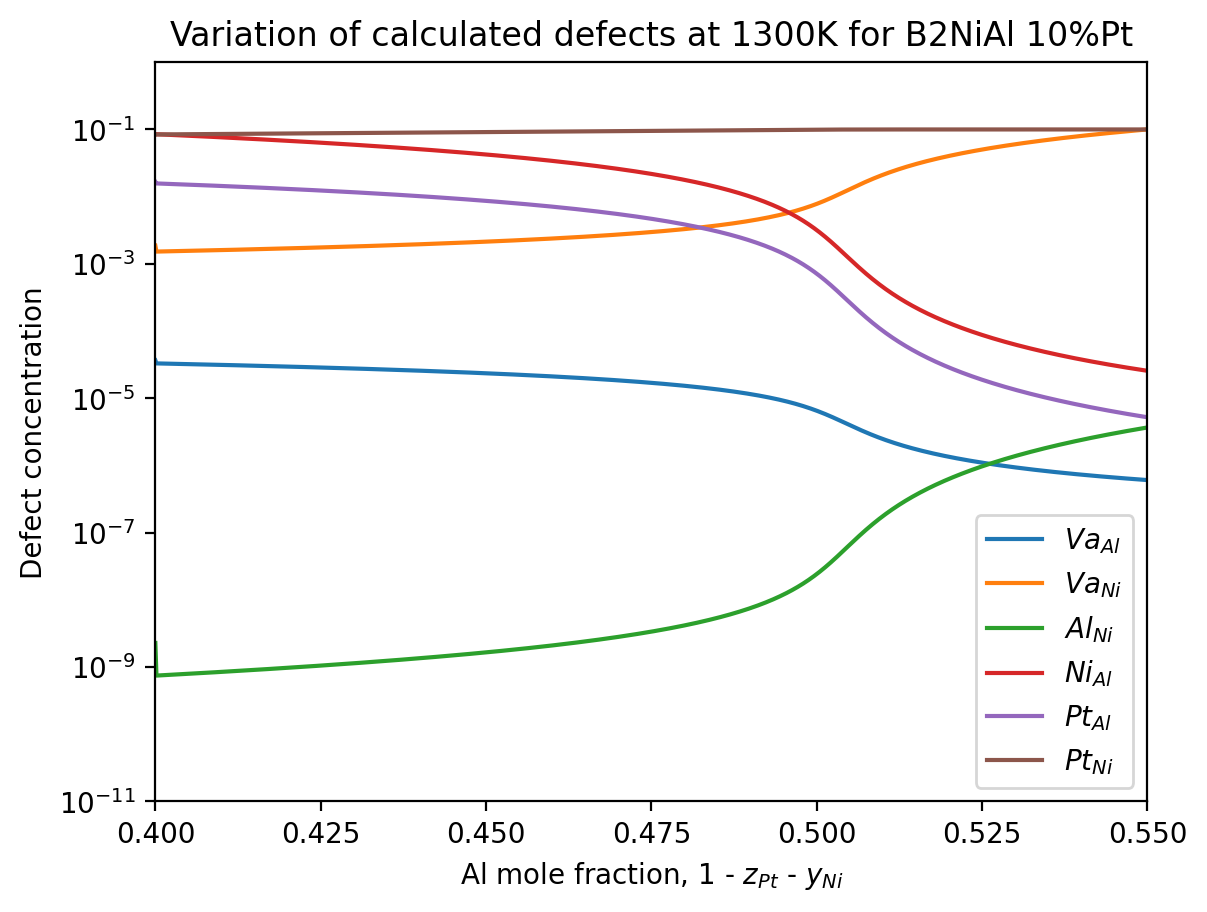

In [52]:
# Variation of calculated defects at 1300K for B2NiAl 10%Pt
plt.plot(x, old_ans1) # calculated defects
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
# plt.yticks(lst)
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $z_{Pt}$ - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$", "$Pt_{Al}$", "$Pt_{Ni}$"], loc="lower right")
plt.title("Variation of calculated defects at 1300K for B2NiAl 10%Pt");

## Comparison

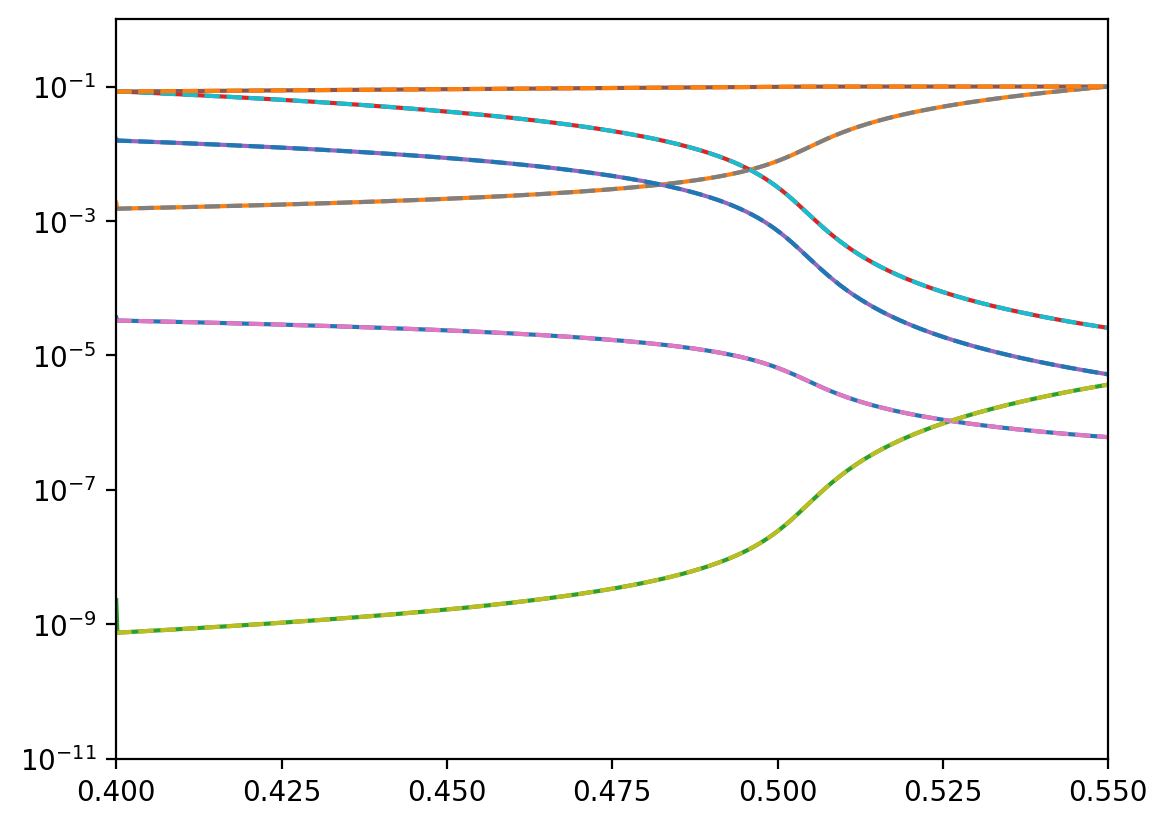

In [53]:
plt.plot(x, old_ans1) # calculated defects used in project work
plt.plot(x, ans1, linestyle='--') # chemical potential approach 
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025));

# Defect energetics of B2 NiAl + 10%Pd

In [54]:
list_fnn_Pd = [4, 2, 0, 0, 2, 1, 1, 2]
list_snn_Pd = [2, 0, 1, 0, 1, 2, 1, 1]

Energies_Pd_Nivac = np.array([-667.86783558, -667.85894031, -667.87078385, -667.81458299, -667.92889926, -667.85012061, -667.81175855, -667.84223908])
Energies_Pd_Alvac = np.array([-668.93812295, -668.55194504, -668.13274527, -668.16708672, -668.49180729, -668.31040664, -668.30667773, -668.48075467])
Energies_Pd_Nianti = np.array([-675.02250133, -675.09751481, -675.10419001, -675.15512468, -675.0645559, -675.07150949, -675.0919637, -675.12694058])
Energies_Pd_Alanti = np.array([-671.13405916, -670.9896101, -671.04632999, -671.02754791, -671.1247471, -671.1927363, -671.0427099, -671.3081047])
Energies_PdonNi = np.array([-674.45513582, -674.35585628, -674.3894627, -674.3989708, -674.40094265, -674.49242222, -674.48001323, -674.50790625])
Energies_PdonAl = np.array([-675.02835252, -675.21577598, -675.28243643, -675.14844375, -675.19335691, -675.2852332, -675.33318427, -675.18121921])

total_E10PdB2NiAl = -674.3842282655528 # Total energy of B2 NiAl+10%Pd (128 atoms)
EfPdB2NiAl = -0.6873973606476302 # Formation energy of B2 NiAl+10%Pd per atom
concentration_Pd = 0.1

In [55]:
def get_10Pdbox_energy(tot, i, Ni_bulk = Ni_bulk, Al_bulk = Al_bulk, Pd_bulk = Pd_bulk):
    """
    Returns supercell energy - n_Ni * Ni_Bulk - n_Al * Al_bulk -n_Pd * Pd_bulk
    
    """
    if i == 'Nivac':
        n_Ni = 50
        n_Al = 64
        n_Pd = 13
    if i == 'Alvac':
        n_Ni = 51
        n_Al = 63
        n_Pd = 13
    if i == 'Pdvac':
        n_Ni = 51
        n_Al = 64
        n_Pd = 12
    if i == 'Nianti':
        n_Ni = 52
        n_Al = 63
        n_Pd = 13
    if i == 'Alanti':
        n_Ni = 50
        n_Al = 65
        n_Pd = 13
    if i == 'PdonNi':
        n_Ni = 50
        n_Al = 64
        n_Pd = 14
    if i == 'PdonAl':
        n_Ni = 51
        n_Al = 63
        n_Pd = 14
    if i == 'Bulk':
        n_Ni = 51
        n_Al = 64
        n_Pd = 13
    return tot - n_Ni * Ni_bulk - n_Al * Al_bulk - n_Pd * Pd_bulk

In [56]:
MuPd_Al = np.linspace(2*EfPdB2NiAl, 0, 1000)
MuPd_Ni = 2*EfPdB2NiAl - MuPd_Al

In [57]:
def getPd_binomial_weighted_formation_energies(Energies, defect_name):
    if defect_name == 'Nivac':
        c_defect=[]
        for i in range(8):c_defect.append(np.exp(-(get_10Pdbox_energy(Energies[i], i=defect_name) - get_10Pdbox_energy(total_E10PdB2NiAl, i='Bulk') + MuPd_Ni) / (Kb*T)))
    if defect_name == 'Alvac':
        c_defect=[]
        for i in range(8):c_defect.append(np.exp(-(get_10Pdbox_energy(Energies[i], i=defect_name) - get_10Pdbox_energy(total_E10PdB2NiAl, i='Bulk') + MuPd_Al) / (Kb*T)))
    if defect_name == 'Nianti':
        c_defect=[]
        for i in range(8):c_defect.append(np.exp(-(get_10Pdbox_energy(Energies[i], i=defect_name) - get_10Pdbox_energy(total_E10PdB2NiAl, i='Bulk') - MuPd_Ni + MuPd_Al) / (Kb*T)))
    if defect_name == 'Alanti':
        c_defect=[]
        for i in range(8):c_defect.append(np.exp(-(get_10Pdbox_energy(Energies[i], i=defect_name) - get_10Pdbox_energy(total_E10PdB2NiAl, i='Bulk') - MuPd_Al + MuPd_Ni) / (Kb*T)))
    
    indexMap = get_indexMap(list_fnn_Pd)
    second_nn_weighted_concentration = [get_weighted_concentration(c_defect, list_snn_Pd, indexMap[i], 
                                                               concentration_Pd, 8) for i in sorted(indexMap)]

    final_wc = get_weighted_concentration(second_nn_weighted_concentration, sorted(indexMap), 
                                      np.arange(len(indexMap)), concentration_Pd, 6)

    return -np.log(final_wc) * Kb * T

In [58]:
def get_binomial_weighted_Pd_on_Ni_Al_energy(Energies):
    
    indexMap = get_indexMap(list_fnn_Pd)

    second_nn_weighted_energies = [get_weighted_concentration(Energies, list_snn_Pd, indexMap[i], 
                                                               concentration_Pt, 8) for i in sorted(indexMap)]

    final_weighted_energy = get_weighted_concentration(second_nn_weighted_energies, sorted(indexMap), 
                                      np.arange(len(indexMap)), concentration_Pt, 6)

    return final_weighted_energy

In [59]:
# Ni vacancy with respect to chemical potential

EfMuPd_Nivac = getPd_binomial_weighted_formation_energies(Energies_Pd_Nivac,'Nivac')

In [60]:
# Al vacancy with respect to chemical potential

EfMuPd_Alvac = getPd_binomial_weighted_formation_energies(Energies_Pd_Alvac,'Alvac')

In [61]:
# Ni antisite with respect to chemical potential

EfMuPd_Nianti = getPd_binomial_weighted_formation_energies(Energies_Pd_Nianti,'Nianti')

In [62]:
# Al antisite with respect to chemical potential

EfMuPd_Alanti = getPd_binomial_weighted_formation_energies(Energies_Pd_Alanti,'Alanti')

In [63]:
# Pt on Al sub-lattice with respect to chemical potential
# Ef = <E_Pt on Al> - <E_Pt on Ni> + mu_Al - mu_Ni

EfMuPd_PdonAl = get_10Pdbox_energy(get_binomial_weighted_Pd_on_Ni_Al_energy(Energies_PdonAl), i = 'PdonAl') - get_10Pdbox_energy(get_binomial_weighted_Pd_on_Ni_Al_energy(Energies_PdonNi), i = 'PdonNi')  + MuPd_Al - MuPd_Ni

In [64]:
EfMuPd_PdonNi = np.zeros((1000))

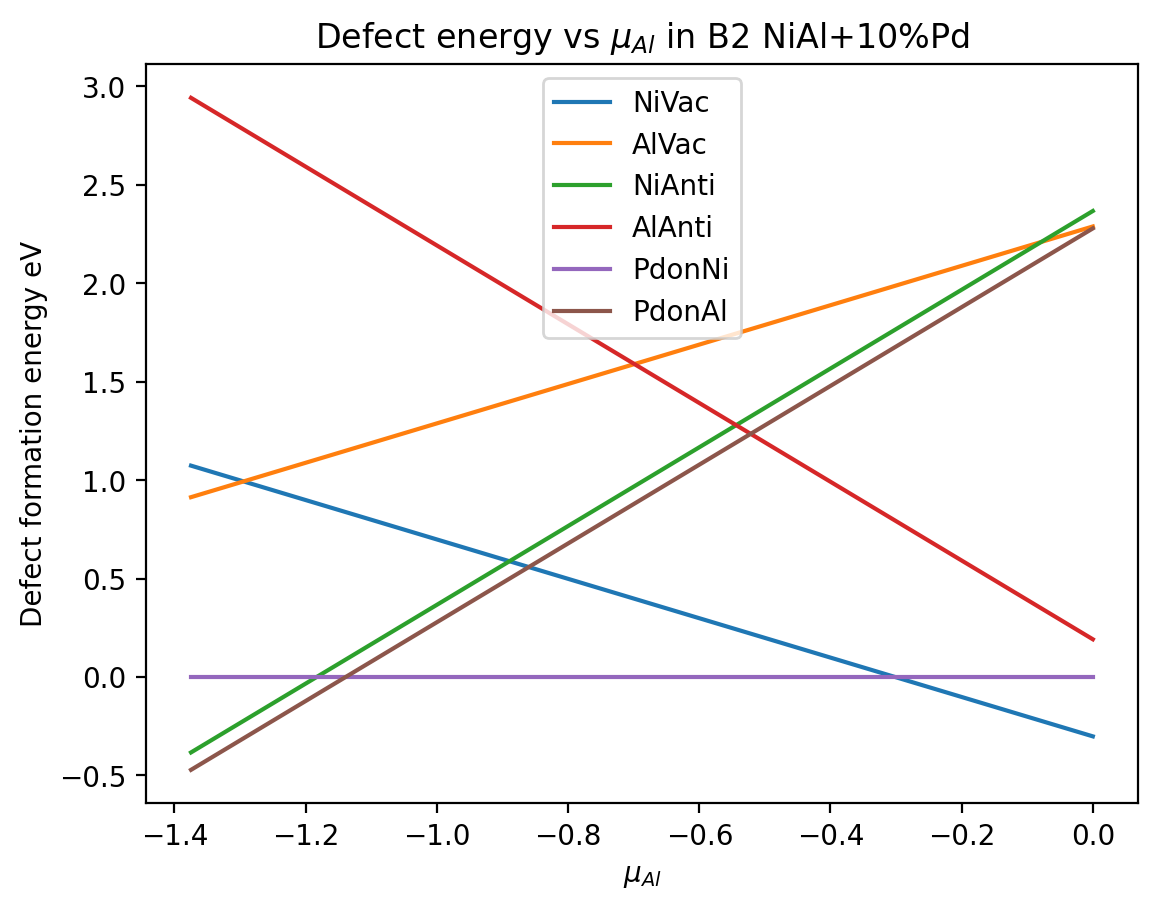

In [65]:
plt.plot(MuPd_Al, EfMuPd_Nivac, label='NiVac')
plt.plot(MuPd_Al, EfMuPd_Alvac, label='AlVac')
plt.plot(MuPd_Al, EfMuPd_Nianti, label='NiAnti')
plt.plot(MuPd_Al, EfMuPd_Alanti, label='AlAnti')
plt.plot(MuPd_Al, EfMuPd_PdonNi, label='PdonNi')
plt.plot(MuPd_Al, EfMuPd_PdonAl, label='PdonAl')
plt.xlabel('$\mu_{Al}$')
plt.ylabel('Defect formation energy eV')
plt.legend()
plt.title('Defect energy vs $\mu_{Al}$ in B2 NiAl+10%Pd');

# Defect concentration of B2 NiAl+ 10%Pd

In [66]:
Pd_exp1 = np.mean(np.exp(-(EfMuPd_Alanti - EfMuPd_Nivac + EfMuPd_Alvac) / (Kb*T)))
Pd_exp2 = np.mean(np.exp(-(EfMuPd_Nianti + EfMuPd_Nivac - EfMuPd_Alvac) / (Kb*T)))
Pd_exp3 = np.mean(np.exp(-(EfMuPd_PdonAl - EfMuPd_PdonNi - EfMuPd_Alvac + EfMuPd_Nivac) / (Kb*T)))
Pd_exp4 = np.mean(np.exp(-(EfMuPd_Nivac + EfMuPd_Alvac) / (Kb*T)))

In [67]:
y_Ni_linspace = np.linspace(.5, .35, 900)
y_Pd = 0.1

def defect_concentration_Pd_function(vars, yNi):
    """
    y_vacAl = a
    y_vacNi = b
    y_AlNi = c
    y_NiAl = d
    y_PdAl = e
    y_PdNi = f
    """
    a, b, c, d, e, f = vars

    return [2*a*c - (b*(1 - 2*d - 2*e - a + b)) * Pd_exp1, 2*b*d - (a*(1 - 2*c - 2*f + a + b)) * Pd_exp2, 
            e*b - (f*a) * Pd_exp3, 4*a*b - (1 + a + b)**2 * Pd_exp4, 
            (1 - 2*c + 2*d - 2*f + a - b)/2 - yNi, e + f - y_Pd] 

def solver_Pd_calc(yNi, values):
    return fsolve(defect_concentration_Pd_function, values, args=yNi, xtol = 1e-11, maxfev=10000)

x = 1 - y_Pd - y_Ni_linspace

In [68]:
# Solving the system of non-linear equation 

prev3 = [6e-7, 1e-5, 3e-9, 0.1, 2e-4, 0.1] # First estimate where F(x) = 0 
ans3 = []

for i in range(len(y_Ni_linspace)):
    prev3 = solver_Pd_calc(y_Ni_linspace[i], prev3)
    ans3.append(prev3)
ans3 = np.array(ans3)

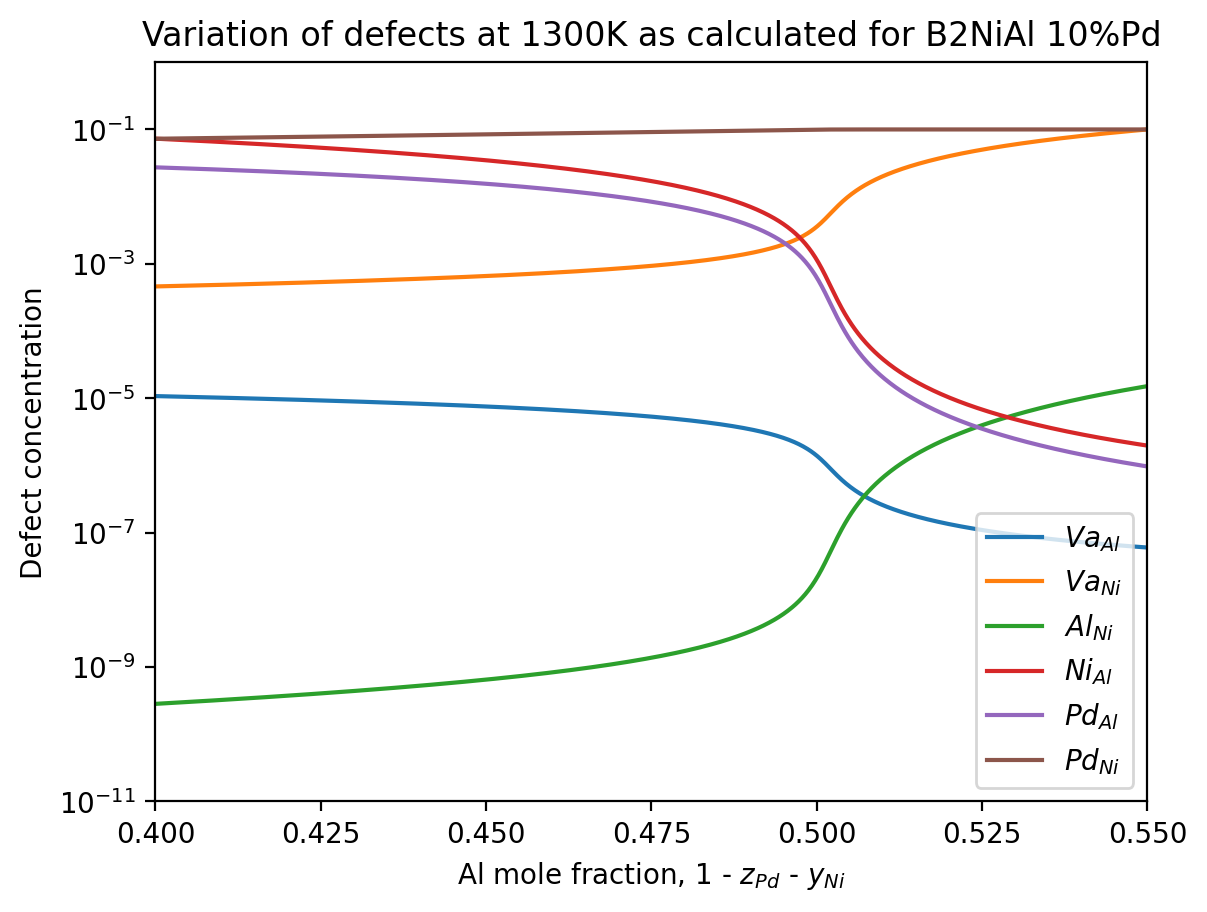

In [69]:
# Variation of defects at 1300K as calculated for B2NiAl 10%Pd
plt.plot(x, ans3)
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
# plt.yticks(lst)
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $z_{Pd}$ - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$", "$Pd_{Al}$", "$Pd_{Ni}$"], loc="lower right")
plt.title("Variation of defects at 1300K as calculated for B2NiAl 10%Pd");

## Comparison

In [70]:
bw_energy_vac_Ni10Pd4 = 0.3860788283094937
bw_energy_vac_Al10Pd4 = 1.600711883944378 # 1.630442280809934 is the old Al vacancy formation energy
bw_energy_Ni_antisite_10Pd4 = 0.9918890709031346
bw_energy_Al_antisite_10Pd4 = 1.5664761313190416
bw_energy_PdonAl_10Pd4 = 0.9034521066879782

In [71]:
old_Pd_exp1 = np.exp(-(bw_energy_Al_antisite_10Pd4 - bw_energy_vac_Ni10Pd4 + bw_energy_vac_Al10Pd4) / (Kb*T))
old_Pd_exp2 = np.exp(-(bw_energy_Ni_antisite_10Pd4 + bw_energy_vac_Ni10Pd4 - bw_energy_vac_Al10Pd4) / (Kb*T))
old_Pd_exp3 = np.exp(-(bw_energy_PdonAl_10Pd4 - 0 - bw_energy_vac_Al10Pd4 + bw_energy_vac_Ni10Pd4) / (Kb*T))
old_Pd_exp4 = np.exp(-(bw_energy_vac_Ni10Pd4 + bw_energy_vac_Al10Pd4) / (Kb*T))

In [72]:
def defect_concentration_old_Pd_function(vars, yNi):
    """
    y_vacAl = a
    y_vacNi = b
    y_AlNi = c
    y_NiAl = d
    y_PdAl = e
    y_PdNi = f
    """
    a, b, c, d, e, f = vars

    return [2*a*c - (b*(1 - 2*d - 2*e - a + b)) * old_Pd_exp1, 2*b*d - (a*(1 - 2*c - 2*f + a + b)) * old_Pd_exp2, 
            e*b - (f*a) * old_Pd_exp3, 4*a*b - (1 + a + b)**2 * old_Pd_exp4, 
            (1 - 2*c + 2*d - 2*f + a - b)/2 - yNi, e + f - y_Pd] 

def solver_old_Pd_calc(yNi, values):
    return fsolve(defect_concentration_old_Pd_function, values, args=yNi, xtol = 1e-11, maxfev=10000)

In [73]:
# Solving the system of non-linear equation 

prev3 = [6e-7, 1e-5, 3e-9, 0.1, 2e-4, 0.1] # First estimate where F(x) = 0 
old_ans3 = []

for i in range(len(y_Ni_linspace)):
    prev3 = solver_old_Pd_calc(y_Ni_linspace[i], prev3)
    old_ans3.append(prev3)
old_ans3 = np.array(old_ans3)

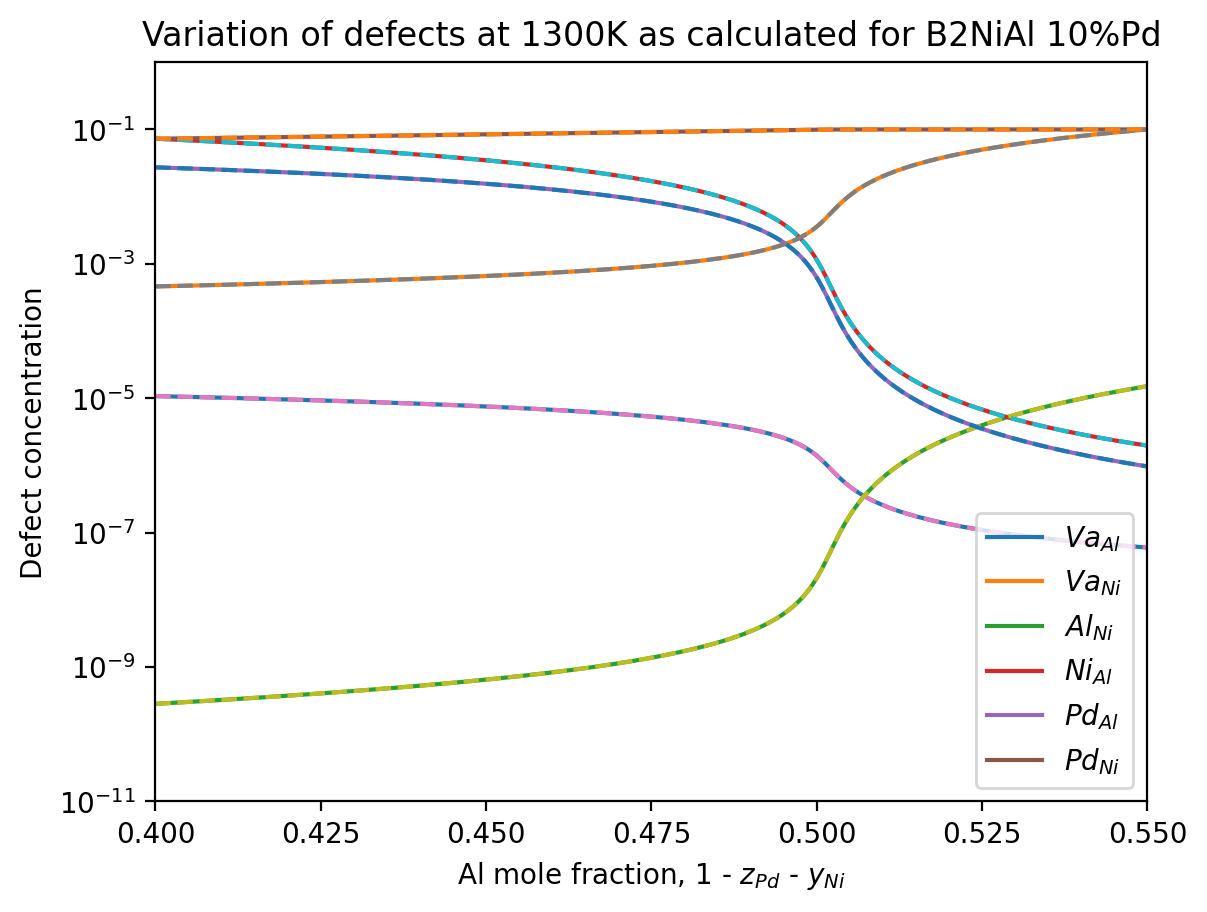

In [74]:
# Variation of defects at 1300K as calculated for B2NiAl 10%Pd
plt.plot(x, old_ans3) # Calculated from porject work method
plt.plot(x, ans3, linestyle='--') # chemical potential approach
plt.yscale('log')
plt.xlim([0.4, .55])
plt.ylim([1e-11, 1])
plt.xticks(np.arange(0.4, 0.55, 0.025))
# plt.yticks(lst)
plt.ylabel("Defect concentration")
plt.xlabel("Al mole fraction, 1 - $z_{Pd}$ - $y_{Ni}$")
plt.legend(["$Va_{Al}$", "$Va_{Ni}$", "$Al_{Ni}$", "$Ni_{Al}$", "$Pd_{Al}$", "$Pd_{Ni}$"], loc="lower right")
plt.title("Variation of defects at 1300K as calculated for B2NiAl 10%Pd");

# Conclusion

The previous work done on binary (B2 NiAl) and B2 NiAl + 10%Pt defect energies are in good agreement with the chemical potential approach.


During rechecking for plotting the B2 NiAl + 10%Pd a small descrepancy was found.


The previous reported Al vacancy energy was **1.63 eV**, after correction is **1.60 eV**. This is verified by the chemical potential approach.